In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

1.14.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.1
pandas 0.25.1
sklearn 0.21.3
tensorflow 1.14.0
tensorflow.python.keras.api._v1.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
print(np.max(x_train), np.min(x_train))

255 0


In [5]:
# x = (x - u) / std
# 归一化处理

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]  训练集归一化
# 要做除法所以要转成 float32，转成二维的，然后再转回三维的
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
# 对其他数据集做同样的处理（不用 fit ）
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


# fit_transform 和transform的区别
# fit 首先训练数据，然后model从训练数据得到必要的变换信息，如特征方差和期望等，并保存为模型的参数
# transform 根据参数，对训练数据做需要的变换。

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2375 - acc: 0.9140 - val_loss: 0.3045 - val_acc: 0.8866
Epoch 2/20
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2293 - acc: 0.9161 - val_loss: 0.3003 - val_acc: 0.8908
Epoch 3/20
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2208 - acc: 0.9194 - val_loss: 0.2967 - val_acc: 0.8892
Epoch 4/20
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2128 - acc: 0.9240 - val_loss: 0.2956 - val_acc: 0.8932
Epoch 5/20
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2057 - acc: 0.9252 - val_loss: 0.2948 - val_acc: 0.8914
Epoch 6/20
55000/55000 [==============================] - 4s 72us/sample - loss: 0.1981 - acc: 0.9282 - val_loss: 0.3197 - val_acc: 0.8866
Epoch 7/20
55000/55000 [==============================] - 4s 73us/sample - loss: 0.1908 - acc: 0.9308 - val_loss: 0.2

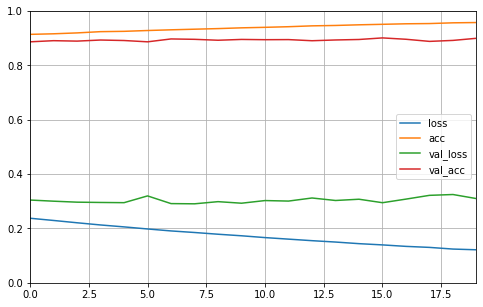

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3501 - acc: 0.8892


[0.3501264241874218, 0.8892]